# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
spark = SparkSession.builder.master("local").appName("Music").getOrCreate()
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [2]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [3]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551430|    P| 1179220|2017-03-30|
|168551548|    P| 1474915|2017-03-30|
|168551323|    P|16889394|2017-03-30|
|168551546|    P| 1474915|2017-03-30|
|168548714|    P|23492572|2017-03-30|
|168550237|    P| 6511070|2017-03-30|
|168550890|    P|23491657|2017-03-30|
|168542653|    P|  133095|2017-03-30|
|168548099|    P| 4984002|2017-03-30|
|168551414|    P|  727162|2017-03-30|
|168543348|    P|       0|2017-03-30|
|168550352|    P|       0|2017-03-30|
|168550970|    P|  277286|2017-03-30|
|168550949|    P|  360750|2017-03-30|
|168545975|    P| 3213069|2017-03-30|
|168551197|    P| 7078121|2017-03-30|
|168546993|    P| 1024747|2017-03-30|
|168543348|    P|       0|2017-03-30|
|168551585|    P| 8131487|2017-03-30|
|168548714|    P|23490801|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [4]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [5]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551430|    P| 1179220|2017-03-30|
|168551548|    P| 1474915|2017-03-30|
|168551323|    P|16889394|2017-03-30|
|168551546|    P| 1474915|2017-03-30|
|168548714|    P|23492572|2017-03-30|
|168550237|    P| 6511070|2017-03-30|
|168550890|    P|23491657|2017-03-30|
|168542653|    P|  133095|2017-03-30|
|168548099|    P| 4984002|2017-03-30|
|168551414|    P|  727162|2017-03-30|
|168543348|    P|       0|2017-03-30|
|168550352|    P|       0|2017-03-30|
|168550970|    P|  277286|2017-03-30|
|168550949|    P|  360750|2017-03-30|
|168545975|    P| 3213069|2017-03-30|
|168551197|    P| 7078121|2017-03-30|
|168546993|    P| 1024747|2017-03-30|
|168543348|    P|       0|2017-03-30|
|168551585|    P| 8131487|2017-03-30|
|168548714|    P|23490801|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [6]:
# simple count rows
df.count()

12331951

In [7]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59308

In [8]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  635566|
|    S|  769664|
|    P|10926721|
+-----+--------+



In [9]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  635566|97911810|
|    S|  769664| 9920471|
|    P|10926721|99997797|
+-----+--------+--------+



In [10]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 30658|
|2017-04-01|    P|485899|
|2017-04-01|    S| 31959|
|2017-04-02|    D| 26418|
|2017-04-02|    P|443671|
|2017-04-02|    S| 29493|
|2017-04-03|    D| 21341|
|2017-04-03|    P|254567|
|2017-04-03|    S| 26355|
|2017-04-04|    D| 20493|
|2017-04-04|    P|374905|
|2017-04-04|    S| 23738|
|2017-04-05|    D| 16620|
|2017-04-05|    P|311488|
|2017-04-05|    S| 19591|
+----------+-----+------+



In [11]:
date_count = df.groupBy('date').count().toPandas()

/Users/hli/anaconda/envs/carnd-term1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

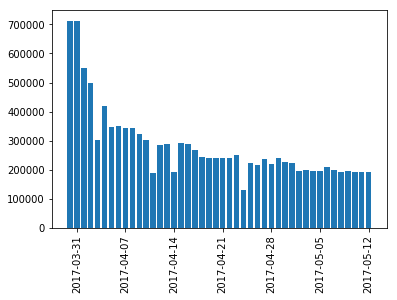

In [12]:
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [13]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [14]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [15]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [16]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36126|
|    0|21861|
+-----+-----+



# Feature generation

In [17]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))


### Frequency features

##### method 1

In [18]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [19]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [20]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167973428|            2|
|167762174|            1|
|168079950|           23|
|168484137|            1|
|168464445|            2|
+---------+-------------+
only showing top 5 rows



In [21]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [22]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [23]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [24]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|168000523|            0|            0|            0|            33|            43|
|166454870|            0|            0|            1|             1|            18|
|167743862|            0|            0|            0|             0|             1|
|167907760|            0|            0|            0|             6|            61|
|167707432|            0|            0|           24|            26|            34|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [25]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [26]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [27]:
# defined as days from last x event
# can generate one feature for each type of event and all event
event_list = ['P', 'D', 'S', ['P', 'D', 'S']]
event_list
def recency_feature_generation(df,event,snapshot_date):
    """
    generate recency features for one event type
    """
    df_feature = df.where(F.col('event').isin(event))\
            .groupBy('uid').agg(F.datediff(F.to_date(F.lit(str(snapshot_date))), F.max(F.col('date')))\
            .alias('days_since_last_'+str(event)))
    return df_feature

In [28]:
# generate recency features for all event_list
for event in event_list:
    df_feature_list.append(recency_feature_generation(df_feature_window,event,snapshot_date))


### Profile features

In [29]:
df_play = spark.read.csv('../data/play_ds.csv',header=True).cache()
df_play = df_play.withColumn('play_time',F.col('play_time').cast('float')).withColumn('song_length',F.col('song_length').cast('float'))
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551430|    ar| 1179220|2017-03-30|    231.0|      231.0|
|168551548|    ar| 1474915|2017-03-30|      5.0|      243.0|
|168551323|    ar|16889394|2017-03-30|     93.0|       93.0|
|168551546|    ar| 1474915|2017-03-30|      0.0|      243.0|
|168548714|    ar|23492572|2017-03-30|      2.0|      359.0|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [30]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [31]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    3|
|    ar|50562|
|    wp|    1|
|    ip| 7294|
+------+-----+



In [32]:
# check if one user has two devices
df_profile_tmp.count()

57860

In [33]:
df_profile_tmp.distinct().count()

57860

In [34]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7294|
|          2|50566|
+-----------+-----+



In [35]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  141|
|          1| 7294|
|          2|50566|
+-----------+-----+



#### Missing data

In [37]:
# There are some missing values that might impact the analysis
df_play.where(F.col('song_length').isNull()).show()

+---------+------+-------+----------+---------+-----------+
|      uid|device|song_id|      date|play_time|song_length|
+---------+------+-------+----------+---------+-----------+
|168441638|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|     null|       null|
|168445005|    ar|   null|2017-03-31|   

In [38]:
# It shows that if the 'play_time' exists, 'song_length' exists as well. So we can directly remove these rows.
df_play.where(F.col('song_length').isNull() & F.col('play_time').isNotNull()).show()

+---+------+-------+----+---------+-----------+
|uid|device|song_id|date|play_time|song_length|
+---+------+-------+----+---------+-----------+
+---+------+-------+----+---------+-----------+



In [39]:
# The non-positive song_length.
df_play.filter( (F.col('song_length') <= 0) ).show()

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551585|    ar| 8131487|2017-03-30|      0.0|        0.0|
|168546393|    ar|  242615|2017-03-30|      0.0|        0.0|
|168551612|    ip| 6662434|2017-03-30|      0.0|        0.0|
|168548528|    ar| 3228339|2017-03-30|      0.0|        0.0|
|168549700|    ar| 7185443|2017-03-30|      0.0|        0.0|
|168551294|    ip|22798857|2017-03-30|      0.0|        0.0|
|168549700|    ar|  142801|2017-03-30|      0.0|        0.0|
|168549700|    ar|  277286|2017-03-30|      0.0|        0.0|
|168542579|    ar| 4037598|2017-03-30|    203.0|        0.0|
|168549700|    ar|   91396|2017-03-30|      0.0|        0.0|
|168549700|    ar|   90126|2017-03-30|      0.0|        0.0|
|168549700|    ar|  228907|2017-03-30|      0.0|        0.0|
|168549700|    ar|  980849|2017-03-30|      0.0|        0.0|
|168551785|    ip| 81314

In [40]:
# Fill these missing song_length with median song length.
med_length = df_play.filter(F.col('song_length') > 0).approxQuantile('song_length', [0.5], 0.25)[0]
print(med_length)
df_play = df_play.withColumn('song_length', F.when(F.col('song_length') > 0, F.col('song_length'))\
                .otherwise(med_length))

242.0


In [41]:
# The non-positive play_time should be filtered out 
# because they are not contributing to the feature generation
df_play.filter( F.col('play_time') <= 0 ).show()

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551546|    ar| 1474915|2017-03-30|      0.0|      243.0|
|168551585|    ar| 8131487|2017-03-30|      0.0|      242.0|
|168546393|    ar|  242615|2017-03-30|      0.0|      242.0|
|168551612|    ip| 6662434|2017-03-30|      0.0|      242.0|
|168548528|    ar| 3228339|2017-03-30|      0.0|      242.0|
|168548099|    ar| 6292506|2017-03-30|      0.0|      183.0|
|168129073|    ar|  347811|2017-03-30|      0.0|      272.0|
|168548099|    ar| 1200933|2017-03-30|      0.0|      222.0|
|168548099|    ar| 3349741|2017-03-30|      0.0|      215.0|
|168541408|    ar|       0|2017-03-30|      0.0|      215.0|
|168549700|    ar| 3678102|2017-03-30|      0.0|      213.0|
|168549700|    ar| 7185443|2017-03-30|      0.0|      242.0|
|168551294|    ip|22798857|2017-03-30|      0.0|      242.0|
|168549700|    ar|  1428

In [44]:
# Remove the rows with NULL 'play_time' values and filter out the dates out of feature date range.
play_feature_window = df_play.filter( (F.col('play_time').isNotNull()) & (F.col('play_time') > 0) & (F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
play_feature_window.show()

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551430|    ar| 1179220|2017-03-30|    231.0|      231.0|
|168551548|    ar| 1474915|2017-03-30|      5.0|      243.0|
|168551323|    ar|16889394|2017-03-30|     93.0|       93.0|
|168548714|    ar|23492572|2017-03-30|      2.0|      359.0|
|168550237|    ar| 6511070|2017-03-30|    144.0|      237.0|
|168550890|    ar|23491657|2017-03-30|    330.0|      331.0|
|168542653|    ar|  133095|2017-03-30|    256.0|      257.0|
|168548099|    ar| 4984002|2017-03-30|    210.0|      210.0|
|168551414|    ar|  727162|2017-03-30| 241070.0|      242.0|
|168543348|    ar|       0|2017-03-30|     27.0|       63.0|
|168550352|    ar|       0|2017-03-30|     68.0|      259.0|
|168550970|    ar|  277286|2017-03-30|    254.0|      254.0|
|168550949|    ar|  360750|2017-03-30|    249.0|      249.0|
|168545975|    ip| 32130

### Total play time features

In [46]:
# generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)
total_play_time_feature = play_feature_window.groupBy('uid').agg(F.sum(F.col('play_time')))
df_feature_list.append(total_play_time_feature)
total_play_time_feature.show()

+---------+--------------+
|      uid|sum(play_time)|
+---------+--------------+
|168554589|       18247.0|
|168555344|       56074.0|
|168579473|        7516.0|
| 46395894|      218462.0|
|168602946|        2314.0|
|168611677|         252.0|
|168615108|        4798.0|
|168618438|       12620.0|
|168623548|         199.0|
|168626949|        1299.0|
|168672161|        1986.0|
|168673342|         532.0|
|168672657|         251.0|
|168675684|        1271.0|
|168678749|         754.0|
|168684828|        2559.0|
|168685189|       44996.0|
|168688012|        1251.0|
|168689028|        4018.0|
|168693071|        2057.0|
+---------+--------------+
only showing top 20 rows



In [47]:
def total_play_time_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when( (F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date), F.col('play_time') ).otherwise(0)).alias('total_play_time_'+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [48]:
time_window_list = [1,3,7,14,30]
df_feature_list.append(total_play_time_feature_generation_time_windows(play_feature_window,time_window_list,snapshot_date))
df_feature_list[-1].show()

+---------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
|      uid|total_play_time__last_1|total_play_time__last_3|total_play_time__last_7|total_play_time__last_14|total_play_time__last_30|
+---------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+
|168554589|                    0.0|                    0.0|                    0.0|                     0.0|                 18247.0|
|168555344|                    0.0|                    0.0|                 8688.0|                 25314.0|                 56074.0|
|168579473|                    0.0|                    0.0|                    0.0|                     0.0|                  7516.0|
| 46395894|                24313.0|                24313.0|                24313.0|                 63715.0|                218462.0|
|168602946|                    0.0|                    0.0|   

### Engaged play frequency features

In [49]:
# generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)
def engaged_play_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate highly engaged play frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when( (F.col('play_time')/F.col('song_length') > 0.8) & (F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('engaged_play_'+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [50]:
time_window_list = [1,3,7,14,30]
df_feature_list.append(engaged_play_feature_generation_time_windows(play_feature_window,time_window_list,snapshot_date))
df_feature_list[-1].show()

+---------+--------------------+--------------------+--------------------+---------------------+---------------------+
|      uid|engaged_play__last_1|engaged_play__last_3|engaged_play__last_7|engaged_play__last_14|engaged_play__last_30|
+---------+--------------------+--------------------+--------------------+---------------------+---------------------+
|168554589|                   0|                   0|                   0|                    0|                   68|
|168555344|                   0|                   0|                  30|                   95|                  214|
|168579473|                   0|                   0|                   0|                    0|                   28|
| 46395894|                  77|                  77|                  77|                  221|                  816|
|168602946|                   0|                   0|                   0|                    0|                   10|
|168611677|                   0|                

# Form training data

In [52]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [53]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [54]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [55]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)

In [ ]:
df_model_final.show()